# Lecture 1

The documentation covers:  
- Altair  
- Pandas Subsetting

In [2]:
import pandas as pd
import altair as alt

In [3]:
workshop = pd.read_csv('data_input/workshoppoll.csv')
academy = pd.read_csv('data_input/academypoll.csv')
landing = pd.read_csv('data_input/landingpoll.csv')

In [4]:
len(workshop['OS'].unique())

20

In [5]:
workshop.columns


Index(['Number', 'User', 'Date Submitted', 'Country', 'Source URL', 'Device',
       'Browser', 'OS', 'How did you hear about us?',
       'Would you like a response to your question or comment?'],
      dtype='object')

In [6]:
academy.columns


Index(['Number', 'User', 'Date Submitted', 'Country', 'Source URL', 'Device',
       'Browser', 'OS', 'How did you hear about us?',
       'Are you a student or a professional?',
       'Would you like a response to your question or comment?'],
      dtype='object')

In [7]:
academy.shape

(242, 11)

In [8]:
landing.columns

Index(['Number', 'User', 'Date Submitted', 'Country', 'Source URL', 'Device',
       'Browser', 'OS', 'How did you hear about us?'],
      dtype='object')

In [9]:
home = landing.append(workshop.iloc[:,0:8], ignore_index=True, sort=False)

In [10]:
home.shape

(488, 9)

In [11]:
home.head()

,Number,User,Date Submitted,Country,Source URL,Device,Browser,OS,How did you hear about us?
0,1,00000000,2018-01-05 01:35:47,Indonesia,https://algorit.ma/,desktop,Firefox 57.0,Windows 8.1,Friends / Family - ...
1,2,00000000,2018-01-05 04:25:43,Indonesia,https://algorit.ma/,desktop,Safari 11.0.1,Mac OS X 10.13.1,Media Publishing
2,3,00000000,2018-01-05 16:36:25,Indonesia,https://algorit.ma/,desktop,Chrome 63.0.3239,Windows 10,Friends / Family - ...
3,4,00000000,2018-01-06 16:40:16,Indonesia,https://algorit.ma/,desktop,Chrome 62.0.3202,Windows 10,Media Publishing
4,5,00000000,2018-01-08 03:45:42,Indonesia,https://algorit.ma/,desktop,Chrome 63.0.3239,Windows 10,Search Engine


In [12]:
home['Device'].unique()

array(['desktop', 'tablet', 'phone'], dtype=object)

In [13]:
home.drop('Number', axis=1, inplace=True)

In [14]:
home['How did you hear about us?'].str.split('-').str[1].unique()

array(['                                                     ', nan,
       ' ha ha                                                     ',
       ' tech in asia                                                    ',
       ' Tech in Asia                                                    ',
       ' Machine Learning Workshop\n', ' The Body Shop', ' IDX Channel',
       ' RFI', ' Pak Andy', ' After interview for IDX Channel',
       ' Australia', ' eventbrite', ' varyan', ' From DS', ' T',
       ' algorit.ma', ' workshop', ' koinworks', ' IDEA',
       ' A friend suggested to check out algoritma, which I am doing now.',
       ' Went to seminar from Iykra at Block 71', ' Purwadhika techwave',
       ' Binus University', ' Telegroup Data Science', ' gojek',
       ' hacktiv8', ' azera', ' from a friend', ' Gojek', ' GOJEK',
       ' talkshow internship', ' kalibrr.com', ' go',
       ' Startup Career fair post',
       ' dari orang lewat pake baju algorit.ma', ' gf', ' techinasia',
     

In [15]:
home['How did you hear about us?'].str.split('-').str[0].unique()
academy['How did you hear about us?'].str.split('-').str[0].unique()

array(['Others ', 'Social Media / Online Ads', 'Search Engine',
       'Friends / Family ', nan, 'Media Publishing', 'Email'],
      dtype=object)

In [16]:
home['Medium'] = home['How did you hear about us?'].str.split('-').str[0]
home['OSGroup'] = home['OS'].str.split(' ').str[0]

In [17]:
academy['Medium'] = academy['How did you hear about us?'].str.split('-').str[0]
academy['OSGroup'] = academy['OS'].str.split(' ').str[0]

In [18]:
home.loc[home['OSGroup'].isin(['Ubuntu', 'Chrome']), 'OSGroup'] = 'Linux'
academy.loc[academy['OSGroup'].isin(['Ubuntu', 'Chrome']), 'OSGroup'] = 'Linux'

In [19]:
home.head()

,User,Date Submitted,Country,Source URL,Device,Browser,OS,How did you hear about us?,Medium,OSGroup
0,00000000,2018-01-05 01:35:47,Indonesia,https://algorit.ma/,desktop,Firefox 57.0,Windows 8.1,Friends / Family - ...,Friends / Family,Windows
1,00000000,2018-01-05 04:25:43,Indonesia,https://algorit.ma/,desktop,Safari 11.0.1,Mac OS X 10.13.1,Media Publishing,Media Publishing,Mac
2,00000000,2018-01-05 16:36:25,Indonesia,https://algorit.ma/,desktop,Chrome 63.0.3239,Windows 10,Friends / Family - ...,Friends / Family,Windows
3,00000000,2018-01-06 16:40:16,Indonesia,https://algorit.ma/,desktop,Chrome 62.0.3202,Windows 10,Media Publishing,Media Publishing,Windows
4,00000000,2018-01-08 03:45:42,Indonesia,https://algorit.ma/,desktop,Chrome 63.0.3239,Windows 10,Search Engine,Search Engine,Windows


In [20]:
academy_com = academy[academy['Are you a student or a professional?'].notnull()]
academy_com = academy_com[academy_com['OSGroup'].notnull()]
academy_com['Are you a student or a professional?'].unique()

array(['Student                                        ',
       'Professional                                        '],
      dtype=object)

In [21]:
home = home[home['Medium'].notnull()]

In [22]:
academy.head()

,Number,User,Date Submitted,Country,Source URL,Device,Browser,OS,How did you hear about us?,Are you a student or a professional?,Would you like a response to your question or comment?,Medium,OSGroup
0,1.0,00000000,2018-01-05 02:14:14,Indonesia,https://algorit.ma/data-science-academy/,desktop,Chrome 63.0.3239,Windows 10,Others - meetup\n ...,Student,Yes (please enter your email address) - rijal1...,Others,Windows
1,2.0,00000000,2018-01-05 06:55:28,Indonesia,https://algorit.ma/data-science-academy/,desktop,Firefox 58.0,Windows 10,Social Media / Online Ads,Professional ...,No thanks,Social Media / Online Ads,Windows
2,3.0,00000000,2018-01-05 07:26:38,Indonesia,https://algorit.ma/data-science-academy/,desktop,Chrome 61.0.3163,Windows 7,Social Media / Online Ads,Professional ...,Yes (please enter your email address) - ...,Social Media / Online Ads,Windows
3,4.0,00000000,2018-01-05 11:25:02,Indonesia,https://algorit.ma/data-science-academy/,desktop,Chrome 63.0.3239,Windows 10,Social Media / Online Ads,Student,Yes (please enter your email address) - cihuym...,Social Media / Online Ads,Windows
4,5.0,00000000,2018-01-08 04:47:46,Indonesia,https://algorit.ma/data-science-academy/,desktop,Chrome 63.0.3239,Windows 10,Search Engine,Professional ...,Yes (please enter your email address) - slamet...,Search Engine,Windows


In [23]:
home.to_csv('data_processed/home.csv')
academy_com.to_csv('data_processed/academy.csv')

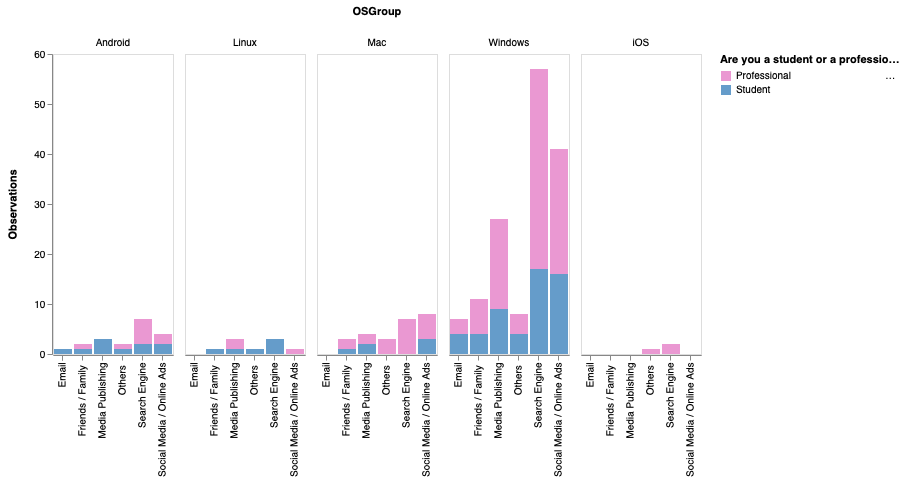

In [24]:
bars = alt.Chart(academy_com).mark_bar().encode(
    # rangeStep allocates 20px for each bar
    alt.X('Medium:N', scale=alt.Scale(rangeStep=20), axis=alt.Axis(title='')),
    alt.Y('count():Q', axis=alt.Axis(title='Observations', grid=False)),
    column='OSGroup:N',
    color=alt.Color('Are you a student or a professional?:N', scale=alt.Scale(range=["#EA98D2", "#659CCA"]))
).configure_axis(
    domainWidth=0.8
)
bars

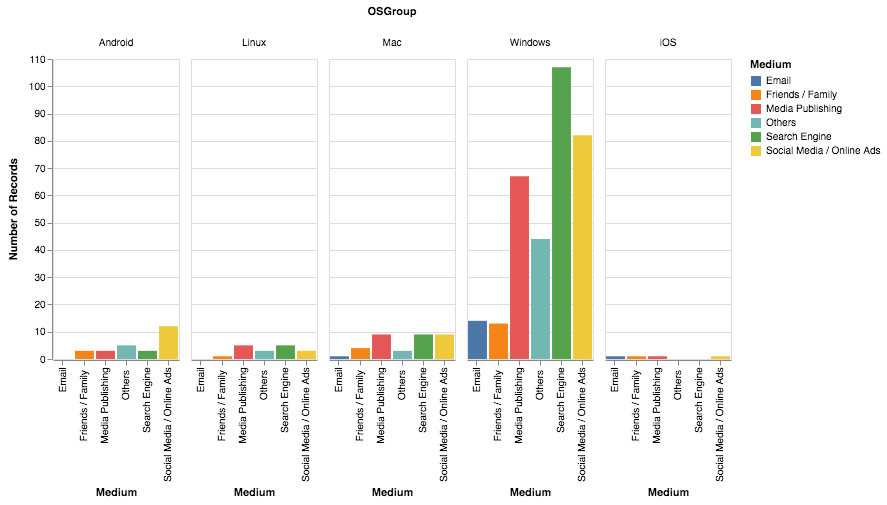

In [508]:
bars = alt.Chart(home).mark_bar().encode(
    x='Medium',
    y='count()',
    column='OSGroup',
    color='Medium'
)

bars

In [509]:
academy_processed = academy.drop(['Number', 'User', 'How did you hear about us?', 'OS', 'Would you like a response to your question or comment?'], axis=1)

In [510]:
academy_processed.head()

,Date Submitted,Country,Source URL,Device,Browser,Are you a student or a professional?,Medium,OSGroup
0,2018-01-05 02:14:14,Indonesia,https://algorit.ma/data-science-academy/,desktop,Chrome 63.0.3239,Student,Others,Windows
1,2018-01-05 06:55:28,Indonesia,https://algorit.ma/data-science-academy/,desktop,Firefox 58.0,Professional ...,Social Media / Online Ads,Windows
2,2018-01-05 07:26:38,Indonesia,https://algorit.ma/data-science-academy/,desktop,Chrome 61.0.3163,Professional ...,Social Media / Online Ads,Windows
3,2018-01-05 11:25:02,Indonesia,https://algorit.ma/data-science-academy/,desktop,Chrome 63.0.3239,Student,Social Media / Online Ads,Windows
4,2018-01-08 04:47:46,Indonesia,https://algorit.ma/data-science-academy/,desktop,Chrome 63.0.3239,Professional ...,Search Engine,Windows


In [511]:
academy_processed.to_csv('data_processed/academy.csv')

# Pandas Subsetting

## `loc` and `iloc`

In [400]:
import numpy as np
df = pd.DataFrame(np.random.rand(5,5), columns=list('abcde'))
df

,a,b,c,d,e
0,0.766353,0.673449,0.164484,0.217101,0.840648
1,0.402085,0.818231,0.753451,0.855733,0.223241
2,0.180187,0.196182,0.404435,0.229754,0.319057
3,0.686565,0.549077,0.672756,0.419615,0.609226
4,0.991818,0.024343,0.046087,0.062270,0.583364


In [401]:
# Select third and fourth row using loc
df.loc[3:4, df.columns]

,a,b,c,d,e
3,0.686565,0.549077,0.672756,0.419615,0.609226
4,0.991818,0.024343,0.046087,0.062270,0.583364


In [402]:
# Select all columns except c using loc
df.loc[3:4, df.columns != 'c']

,a,b,d,e
3,0.686565,0.549077,0.419615,0.609226
4,0.991818,0.024343,0.062270,0.583364


In [403]:
# using drop to drop column d
df.drop('d', axis=1)

,a,b,c,e
0,0.766353,0.673449,0.164484,0.840648
1,0.402085,0.818231,0.753451,0.223241
2,0.180187,0.196182,0.404435,0.319057
3,0.686565,0.549077,0.672756,0.609226
4,0.991818,0.024343,0.046087,0.583364


In [404]:
df.drop(['b', 'd'], axis=1)

,a,c,e
0,0.766353,0.164484,0.840648
1,0.402085,0.753451,0.223241
2,0.180187,0.404435,0.319057
3,0.686565,0.672756,0.609226
4,0.991818,0.046087,0.583364


In [405]:
# first column of data as the index
df = pd.read_csv('data_input/sample_data.csv', index_col=0)
df

,state,color,food,age,height,score
Jane,NY,blue,Steak,30,165,4.6
Niko,TX,green,Lamb,2,70,8.3
Aaron,FL,red,Mango,12,120,9.0
Penelope,AL,white,Apple,4,80,3.3
Dean,AK,gray,Cheese,32,180,1.8
Christina,TX,black,Melon,33,172,9.5
Cornelia,TX,red,Beans,69,150,2.2


In [406]:
print(df.index)
print(df.columns)
print(df.values)

Index(['Jane', 'Niko', 'Aaron', 'Penelope', 'Dean', 'Christina', 'Cornelia'], dtype='object')
Index(['state', 'color', 'food', 'age', 'height', 'score'], dtype='object')
[['NY' 'blue' 'Steak' 30 165 4.6]
 ['TX' 'green' 'Lamb' 2 70 8.3]
 ['FL' 'red' 'Mango' 12 120 9.0]
 ['AL' 'white' 'Apple' 4 80 3.3]
 ['AK' 'gray' 'Cheese' 32 180 1.8]
 ['TX' 'black' 'Melon' 33 172 9.5]
 ['TX' 'red' 'Beans' 69 150 2.2]]


In [407]:
print(type(df.index))
print(type(df.columns))
print(type(df.values))

<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.base.Index'>
<class 'numpy.ndarray'>


In [408]:
# selecting a single column of DataFrame returns a Series
print(type(df['food']))
print(df['food'])

<class 'pandas.core.series.Series'>
Jane          Steak
Niko           Lamb
Aaron         Mango
Penelope      Apple
Dean         Cheese
Christina     Melon
Cornelia      Beans
Name: food, dtype: object


In [409]:
subset1 = df[['food', 'color', 'score']]
print(type(subset1))
print(subset1)

<class 'pandas.core.frame.DataFrame'>
             food  color  score
Jane        Steak   blue    4.6
Niko         Lamb  green    8.3
Aaron       Mango    red    9.0
Penelope    Apple  white    3.3
Dean       Cheese   gray    1.8
Christina   Melon  black    9.5
Cornelia    Beans    red    2.2


In [410]:
subset2 = df[['food']]
print(type(subset2))
print(subset2)

<class 'pandas.core.frame.DataFrame'>
             food
Jane        Steak
Niko         Lamb
Aaron       Mango
Penelope    Apple
Dean       Cheese
Christina   Melon
Cornelia    Beans


In [411]:
subset3 = df.loc['Niko']
print(type(subset3))
print(subset3)

<class 'pandas.core.series.Series'>
state        TX
color     green
food       Lamb
age           2
height       70
score       8.3
Name: Niko, dtype: object


In [412]:
subset4 = df.loc[['Niko', 'Dean']]
print(type(subset4))
print(subset4)

<class 'pandas.core.frame.DataFrame'>
     state  color    food  age  height  score
Niko    TX  green    Lamb    2      70    8.3
Dean    AK   gray  Cheese   32     180    1.8


In [413]:
# slice notation (start:stop:step)
print(df.loc['Aaron':'Cornelia'])
print(df.loc['Aaron':'Cornelia':2])

          state  color    food  age  height  score
Aaron        FL    red   Mango   12     120    9.0
Penelope     AL  white   Apple    4      80    3.3
Dean         AK   gray  Cheese   32     180    1.8
Christina    TX  black   Melon   33     172    9.5
Cornelia     TX    red   Beans   69     150    2.2
         state color    food  age  height  score
Aaron       FL   red   Mango   12     120    9.0
Dean        AK  gray  Cheese   32     180    1.8
Cornelia    TX   red   Beans   69     150    2.2


In [414]:
df.loc[:'Aaron']

,state,color,food,age,height,score
Jane,NY,blue,Steak,30,165,4.6
Niko,TX,green,Lamb,2,70,8.3
Aaron,FL,red,Mango,12,120,9.0


In [415]:
# Using .loc[row, column] simultaneously
df.loc['Dean':'Cornelia', ['age','state','score']]

,age,state,score
Dean,32,AK,1.8
Christina,33,TX,9.5
Cornelia,69,TX,2.2


In [416]:
df.loc[:'Aaron', 'color':]

,color,food,age,height,score
Jane,blue,Steak,30,165,4.6
Niko,green,Lamb,2,70,8.3
Aaron,red,Mango,12,120,9.0


In [417]:
df.loc[:,'color':]

,color,food,age,height,score
Jane,blue,Steak,30,165,4.6
Niko,green,Lamb,2,70,8.3
Aaron,red,Mango,12,120,9.0
Penelope,white,Apple,4,80,3.3
Dean,gray,Cheese,32,180,1.8
Christina,black,Melon,33,172,9.5
Cornelia,red,Beans,69,150,2.2


In [418]:
print(df.loc[['Penelope', 'Dean'], :])
print(df.loc[['Penelope', 'Dean']])

         state  color    food  age  height  score
Penelope    AL  white   Apple    4      80    3.3
Dean        AK   gray  Cheese   32     180    1.8
         state  color    food  age  height  score
Penelope    AL  white   Apple    4      80    3.3
Dean        AK   gray  Cheese   32     180    1.8


In [419]:
print(df.iloc[1])
# print(df.loc['Niko'])

state        TX
color     green
food       Lamb
age           2
height       70
score       8.3
Name: Niko, dtype: object


In [420]:
print(df.iloc[[1,3,6]])

         state  color   food  age  height  score
Niko        TX  green   Lamb    2      70    8.3
Penelope    AL  white  Apple    4      80    3.3
Cornelia    TX    red  Beans   69     150    2.2


In [421]:
df.iloc[4:]

,state,color,food,age,height,score
Dean,AK,gray,Cheese,32,180,1.8
Christina,TX,black,Melon,33,172,9.5
Cornelia,TX,red,Beans,69,150,2.2


In [422]:
# select 3rd position to end, step by 2
df.iloc[3::2]

,state,color,food,age,height,score
Penelope,AL,white,Apple,4,80,3.3
Christina,TX,black,Melon,33,172,9.5


In [423]:
df.iloc[:4, [1,2,5]]

,color,food,score
Jane,blue,Steak,4.6
Niko,green,Lamb,8.3
Aaron,red,Mango,9.0
Penelope,white,Apple,3.3


In [424]:
df.loc['Niko':'Cornelia']
# better than: df['Niko':'Cornelia']
# better than: df[1:]

,state,color,food,age,height,score
Niko,TX,green,Lamb,2,70,8.3
Aaron,FL,red,Mango,12,120,9.0
Penelope,AL,white,Apple,4,80,3.3
Dean,AK,gray,Cheese,32,180,1.8
Christina,TX,black,Melon,33,172,9.5
Cornelia,TX,red,Beans,69,150,2.2


In [425]:
# series selection
food = df['food']
food.loc['Dean']

'Cheese'

In [426]:
food

Jane          Steak
Niko           Lamb
Aaron         Mango
Penelope      Apple
Dean         Cheese
Christina     Melon
Cornelia      Beans
Name: food, dtype: object

In [427]:
print(type(df.height))
df.height

<class 'pandas.core.series.Series'>


Jane         165
Niko          70
Aaron        120
Penelope      80
Dean         180
Christina    172
Cornelia     150
Name: height, dtype: int64

In [428]:
df.loc['Dean':'Cornelia'].height

Dean         180
Christina    172
Cornelia     150
Name: height, dtype: int64

## Boolean Indexing

In [429]:
so = pd.read_csv('data_input/stackoverflow_qa.csv', index_col=0)
so.head()

,creationdate,score,viewcount,title,answercount,commentcount,favoritecount,quest_name,quest_rep,ans_name,ans_rep
id,,,,,,,,,,,
5486226,2011-03-30 12:26:50,4,2113,Rolling median in python,3,4,1.0,yueerhu,125.0,Mike Pennington,26995.0
5515021,2011-04-01 14:50:44,8,7015,Compute a compounded return series in Python,3,6,7.0,Jason Strimpel,3301.0,Mike Pennington,26995.0
5558607,2011-04-05 21:13:50,2,7392,Sort a pandas DataMatrix in ascending order,2,0,1.0,Jason Strimpel,3301.0,Wes McKinney,43310.0
6467832,2011-06-24 12:31:45,9,13056,How to get the correlation between two timeser...,1,0,7.0,user814005,117.0,Wes McKinney,43310.0
7577546,2011-09-28 01:58:38,9,2488,"Using pandas, how do I subsample a large DataF...",1,0,5.0,Uri Laserson,958.0,HYRY,54137.0


In [430]:
criteria = [True, False, False, True, True]
sohead = so.head()
sohead[criteria]

,creationdate,score,viewcount,title,answercount,commentcount,favoritecount,quest_name,quest_rep,ans_name,ans_rep
id,,,,,,,,,,,
5486226,2011-03-30 12:26:50,4,2113,Rolling median in python,3,4,1.0,yueerhu,125.0,Mike Pennington,26995.0
6467832,2011-06-24 12:31:45,9,13056,How to get the correlation between two timeser...,1,0,7.0,user814005,117.0,Wes McKinney,43310.0
7577546,2011-09-28 01:58:38,9,2488,"Using pandas, how do I subsample a large DataF...",1,0,5.0,Uri Laserson,958.0,HYRY,54137.0


In [431]:
sohead.columns

Index(['creationdate', 'score', 'viewcount', 'title', 'answercount',
       'commentcount', 'favoritecount', 'quest_name', 'quest_rep', 'ans_name',
       'ans_rep'],
      dtype='object')

In [432]:
criteria = so['score'] >= 600
so[criteria]

,creationdate,score,viewcount,title,answercount,commentcount,favoritecount,quest_name,quest_rep,ans_name,ans_rep
id,,,,,,,,,,,
11346283,2012-07-05 14:21:15,834,931604,Renaming columns in pandas,21,1,231.0,user1504276,4206.0,eumiro,104313.0
13411544,2012-11-16 06:26:40,710,802655,Delete column from pandas DataFrame using pyth...,14,0,198.0,John,8807.0,Wes McKinney,43310.0
14262433,2013-01-10 16:20:32,627,178708,"""Large data"" work flows using pandas",12,4,611.0,Zelazny7,16076.0,Jeff,62248.0


In [433]:
so[criteria].shape

(3, 11)

In [434]:
so[so['score'] >= 600].head()

,creationdate,score,viewcount,title,answercount,commentcount,favoritecount,quest_name,quest_rep,ans_name,ans_rep
id,,,,,,,,,,,
11346283,2012-07-05 14:21:15,834,931604,Renaming columns in pandas,21,1,231.0,user1504276,4206.0,eumiro,104313.0
13411544,2012-11-16 06:26:40,710,802655,Delete column from pandas DataFrame using pyth...,14,0,198.0,John,8807.0,Wes McKinney,43310.0
14262433,2013-01-10 16:20:32,627,178708,"""Large data"" work flows using pandas",12,4,611.0,Zelazny7,16076.0,Jeff,62248.0


In [435]:
criteria = so['ans_name'] == 'Scott Boston'
so[criteria].head()

,creationdate,score,viewcount,title,answercount,commentcount,favoritecount,quest_name,quest_rep,ans_name,ans_rep
id,,,,,,,,,,,
43491342,2017-04-19 09:14:28,4,167,Merging pandas dataframes based on nearest val...,1,0,NaN,AkiRoss,3991.0,Scott Boston,23611.0
43190850,2017-04-03 17:31:33,1,284,Python Seaborn Plot ValueError,2,3,NaN,Ryan,545.0,Scott Boston,23611.0
43176052,2017-04-03 03:21:12,2,39,Convert an indexed pandas matrix to a flat dat...,2,0,NaN,alvas,31923.0,Scott Boston,23611.0
43209525,2017-04-04 14:03:17,5,131,Pandas: Optimal way to MultiIndex columns,2,0,0.0,sparc_spread,5470.0,Scott Boston,23611.0
43211893,2017-04-04 15:45:17,0,38,How to calculate a index series for a event wi...,1,3,NaN,zsljulius,1102.0,Scott Boston,23611.0


In [436]:
crit1 = so['score'] > 5
crit2 = so['ans_name'] == 'Scott Boston'
# only evaluates to True if crit1 and crit2 are both True
criteria = criteria1 & criteria2
so[criteria]

,creationdate,score,viewcount,title,answercount,commentcount,favoritecount,quest_name,quest_rep,ans_name,ans_rep
id,,,,,,,,,,,
44877663,2017-07-03 04:07:59,9,1267,Error: float object has no attribute notnull,3,2,1.0,Vivian Tio,181.0,Scott Boston,23611.0


In [437]:
# each condition in parantheses
so[(so['ans_name'] == 'Scott Boston') & (so['score'] > 4)]

,creationdate,score,viewcount,title,answercount,commentcount,favoritecount,quest_name,quest_rep,ans_name,ans_rep
id,,,,,,,,,,,
43209525,2017-04-04 14:03:17,5,131,Pandas: Optimal way to MultiIndex columns,2,0,0.0,sparc_spread,5470.0,Scott Boston,23611.0
42870703,2017-03-18 05:06:22,5,125,Simultaneous operation of groupby and resample...,1,0,1.0,S. Naribole,43.0,Scott Boston,23611.0
45064916,2017-07-12 18:16:49,5,428,How to find the correlation between a group of...,2,5,NaN,BKS,506.0,Scott Boston,23611.0
44877663,2017-07-03 04:07:59,9,1267,Error: float object has no attribute notnull,3,2,1.0,Vivian Tio,181.0,Scott Boston,23611.0
47061564,2017-11-01 18:40:36,5,60,How to create strings from dataframe columns e...,5,0,NaN,hernanavella,1890.0,Scott Boston,23611.0


In [438]:
so[(so['score'] >= 800) | (so['viewcount'] >= 600000)]

,creationdate,score,viewcount,title,answercount,commentcount,favoritecount,quest_name,quest_rep,ans_name,ans_rep
id,,,,,,,,,,,
11346283,2012-07-05 14:21:15,834,931604,Renaming columns in pandas,21,1,231.0,user1504276,4206.0,eumiro,104313.0
12555323,2012-09-23 19:00:01,406,698537,Adding new column to existing DataFrame in Pyt...,20,0,128.0,tomasz74,2920.0,joaquin,44318.0
13411544,2012-11-16 06:26:40,710,802655,Delete column from pandas DataFrame using pyth...,14,0,198.0,John,8807.0,Wes McKinney,43310.0


The tilde character `~` represents the not operator and reverses a condition

In [439]:
so[~(so['quest_name'] == 'joaquin') & (so['viewcount'] >= 600000)]

,creationdate,score,viewcount,title,answercount,commentcount,favoritecount,quest_name,quest_rep,ans_name,ans_rep
id,,,,,,,,,,,
11346283,2012-07-05 14:21:15,834,931604,Renaming columns in pandas,21,1,231.0,user1504276,4206.0,eumiro,104313.0
12555323,2012-09-23 19:00:01,406,698537,Adding new column to existing DataFrame in Pyt...,20,0,128.0,tomasz74,2920.0,joaquin,44318.0
13411544,2012-11-16 06:26:40,710,802655,Delete column from pandas DataFrame using pyth...,14,0,198.0,John,8807.0,Wes McKinney,43310.0


In [440]:
so[~(so['quest_name'] == 'joaquin') & ~(so['viewcount'] < 600000)]

,creationdate,score,viewcount,title,answercount,commentcount,favoritecount,quest_name,quest_rep,ans_name,ans_rep
id,,,,,,,,,,,
11346283,2012-07-05 14:21:15,834,931604,Renaming columns in pandas,21,1,231.0,user1504276,4206.0,eumiro,104313.0
12555323,2012-09-23 19:00:01,406,698537,Adding new column to existing DataFrame in Pyt...,20,0,128.0,tomasz74,2920.0,joaquin,44318.0
13411544,2012-11-16 06:26:40,710,802655,Delete column from pandas DataFrame using pyth...,14,0,198.0,John,8807.0,Wes McKinney,43310.0


In [441]:
criteria = so['ans_name'].isin(['John', 'tomasz74', 'joaquin'])
so[criteria].head()

,creationdate,score,viewcount,title,answercount,commentcount,favoritecount,quest_name,quest_rep,ans_name,ans_rep
id,,,,,,,,,,,
12555323,2012-09-23 19:00:01,406,698537,Adding new column to existing DataFrame in Pyt...,20,0,128.0,tomasz74,2920.0,joaquin,44318.0
13331518,2012-11-11 13:26:27,32,44634,How to add a single item to a Pandas Series,5,0,3.0,eran,4226.0,joaquin,44318.0
20053801,2013-11-18 17:20:16,1,49,Difference between log(dataframe) in IPython a...,1,6,NaN,gt6989b,1340.0,joaquin,44318.0
20297332,2013-11-30 06:28:21,62,83649,Python pandas dataframe: retrieve number of co...,3,1,17.0,user1802143,2546.0,John,8807.0
26022172,2014-09-24 16:39:59,1,246,"python, how to convert a pandas series into a ...",1,0,NaN,woshitom,385.0,joaquin,44318.0


The `isnull` method returns a boolean Series where True indicates a missing value. For instance, questions that do not have an accepted answer have missing values for `ans_name`:

In [442]:
noanswer = so['ans_name'].isnull()
noanswer.head(6)

id
5486226    False
5515021    False
5558607    False
6467832    False
7577546    False
7766400     True
Name: ans_name, dtype: bool

In [443]:
so[noanswer].head()

,creationdate,score,viewcount,title,answercount,commentcount,favoritecount,quest_name,quest_rep,ans_name,ans_rep
id,,,,,,,,,,,
7766400,2011-10-14 10:33:54,2,977,Pandas + Django + mod_wsgi + virtualenv,1,2,1.0,Evan Davey,100.0,NaN,NaN
8451327,2011-12-09 20:27:24,1,2435,Python map() function output into Pandas DataF...,1,0,1.0,briant57,6.0,NaN,NaN
8966871,2012-01-23 03:21:00,0,287,Running Python/Numpy/Pandas on older secure co...,0,3,NaN,Casey,16.0,NaN,NaN
9641916,2012-03-09 22:36:52,7,5519,Python Pandas: can't find numpy.core.multiarra...,4,2,NaN,Dylan Cutler,41.0,NaN,NaN
9647656,2012-03-10 15:35:26,3,986,Pandas dataframe in mixed mode can't serialize...,1,0,NaN,David van Coevorden,45.0,NaN,NaN


In [444]:
so['ans_name'].notnull().head(6)

id
5486226     True
5515021     True
5558607     True
6467832     True
7577546     True
7766400    False
Name: ans_name, dtype: bool

In [445]:
john = so[so['ans_name'] == 'John']
print(john.shape)
johnview = john['viewcount']

(4, 11)


Instead of writing two boolean conditions to select all values inside of a range as was done above, you can use the `between` method:

In [446]:
print(johnview)
johnview[johnview.between(2694,100000)]

id
20297332    83649
33772398       82
36344106     2694
35441231      461
Name: viewcount, dtype: int64


id
20297332    83649
36344106     2694
Name: viewcount, dtype: int64

In [447]:
so.loc[(so.viewcount >= 400) & (so['ans_name'] == 'John')]

,creationdate,score,viewcount,title,answercount,commentcount,favoritecount,quest_name,quest_rep,ans_name,ans_rep
id,,,,,,,,,,,
20297332,2013-11-30 06:28:21,62,83649,Python pandas dataframe: retrieve number of co...,3,1,17.0,user1802143,2546.0,John,8807.0
36344106,2016-03-31 21:25:38,1,2694,How to update dataframe value,2,0,NaN,Mateyobi,56.0,John,6947.0
35441231,2016-02-16 19:19:06,0,461,Iterate through and overwrite specific values ...,2,2,NaN,John,23.0,John,23.0


Find all the questions with more than 800k views but only return the `title`, `viewcount`, and `ans_name` columns:

In [448]:
so.loc[so.viewcount > 800000, ['title', 'viewcount', 'ans_name']]

,title,viewcount,ans_name
id,,,
11346283,Renaming columns in pandas,931604,eumiro
13411544,Delete column from pandas DataFrame using pyth...,802655,Wes McKinney


Select rows with `favoritecount` between 35 and 40 and every third column beginning from `title` to the end:

In [449]:
so.loc[so.favoritecount.between(35,40), 'title'::3]

,title,favoritecount,ans_name
id,,,
12356501,Pandas: create two new columns in a dataframe ...,39.0,DSM
13295735,How can I replace all the NaN values with Zero...,39.0,Aman
13784192,"Creating an empty Pandas DataFrame, then filli...",40.0,Andy Hayden
14529838,Apply multiple functions to multiple groupby c...,35.0,Zelazny7
18062135,Combining two Series into a DataFrame in pandas,36.0,Andy Hayden
18171739,UnicodeDecodeError when reading CSV file in Pa...,37.0,Stefan
20490274,How to reset index in a pandas data frame?,39.0,mkln
21800169,Python Pandas: Get index of rows which column ...,40.0,unutbu
24251219,Pandas read_csv low_memory and dtype options,40.0,firelynx


In [450]:
# using boolean selector on columns
so.loc[:, [True, False, False] * 4].head()

,creationdate,title,favoritecount,ans_name
id,,,,
5486226,2011-03-30 12:26:50,Rolling median in python,1.0,Mike Pennington
5515021,2011-04-01 14:50:44,Compute a compounded return series in Python,7.0,Mike Pennington
5558607,2011-04-05 21:13:50,Sort a pandas DataMatrix in ascending order,1.0,Wes McKinney
6467832,2011-06-24 12:31:45,How to get the correlation between two timeser...,7.0,Wes McKinney
7577546,2011-09-28 01:58:38,"Using pandas, how do I subsample a large DataF...",5.0,HYRY


Let’s say we flipped 10 coins one-hundred times and store each trial in a column in the DataFrame below:

In [451]:
# randint(low is inclusive, high is exclusive)
coins = pd.DataFrame(np.random.randint(low=0,high=2,size=(100,10)), 
                     columns = list('abcdefghij'))
coins.head()

,a,b,c,d,e,f,g,h,i,j
0,0,0,1,0,0,0,0,1,1,0
1,0,1,0,0,0,0,1,0,0,1
2,1,1,0,0,0,0,1,1,0,0
3,0,1,0,1,1,1,1,0,0,0
4,1,1,1,0,0,0,0,0,0,1


In [452]:
import random
random.seed(100)
print(coins.shape)
coin_mean = coins.mean()
print(coin_mean)

(100, 10)
a    0.51
b    0.49
c    0.51
d    0.50
e    0.55
f    0.42
g    0.52
h    0.45
i    0.48
j    0.46
dtype: float64


In [453]:
# only 6 columns out of 10 has a column mean of > 0.5
coins.loc[:,coin_mean > .5].shape

(100, 4)

In [454]:
# column to column boolean comparison
so[so['answercount'] > so['score']].head(3)

,creationdate,score,viewcount,title,answercount,commentcount,favoritecount,quest_name,quest_rep,ans_name,ans_rep
id,,,,,,,,,,,
8273092,2011-11-25 18:39:02,1,2333,python: pandas install errors,2,0,NaN,codingknob,2279.0,codingknob,2279.0
9927711,2012-03-29 14:42:42,1,1659,Reading csv in python pandas and handling bad ...,3,0,2.0,Dave31415,914.0,eumiro,104313.0
10003171,2012-04-03 23:59:41,1,404,What is an efficient way in pandas to do summa...,2,1,NaN,LmW.,486.0,Wes McKinney,43310.0


## Styling Pandas

In [512]:
home2 = home.copy()
home2.head()

,Browser,Country,Date Submitted,Device,How did you hear about us?,OS,Source URL,User,Medium,OSGroup
0,Firefox 57.0,Indonesia,2018-01-05 01:35:47,desktop,Friends / Family - ...,Windows 8.1,https://algorit.ma/,00000000,Friends / Family,Windows
1,Safari 11.0.1,Indonesia,2018-01-05 04:25:43,desktop,Media Publishing,Mac OS X 10.13.1,https://algorit.ma/,00000000,Media Publishing,Mac
2,Chrome 63.0.3239,Indonesia,2018-01-05 16:36:25,desktop,Friends / Family - ...,Windows 10,https://algorit.ma/,00000000,Friends / Family,Windows
3,Chrome 62.0.3202,Indonesia,2018-01-06 16:40:16,desktop,Media Publishing,Windows 10,https://algorit.ma/,00000000,Media Publishing,Windows
4,Chrome 63.0.3239,Indonesia,2018-01-08 03:45:42,desktop,Search Engine,Windows 10,https://algorit.ma/,00000000,Search Engine,Windows


In [513]:
home2.loc[[0,2,3], 'Country'] = ['Singapore', 'China', 'United States']
home2.head()

,Browser,Country,Date Submitted,Device,How did you hear about us?,OS,Source URL,User,Medium,OSGroup
0,Firefox 57.0,Singapore,2018-01-05 01:35:47,desktop,Friends / Family - ...,Windows 8.1,https://algorit.ma/,00000000,Friends / Family,Windows
1,Safari 11.0.1,Indonesia,2018-01-05 04:25:43,desktop,Media Publishing,Mac OS X 10.13.1,https://algorit.ma/,00000000,Media Publishing,Mac
2,Chrome 63.0.3239,China,2018-01-05 16:36:25,desktop,Friends / Family - ...,Windows 10,https://algorit.ma/,00000000,Friends / Family,Windows
3,Chrome 62.0.3202,United States,2018-01-06 16:40:16,desktop,Media Publishing,Windows 10,https://algorit.ma/,00000000,Media Publishing,Windows
4,Chrome 63.0.3239,Indonesia,2018-01-08 03:45:42,desktop,Search Engine,Windows 10,https://algorit.ma/,00000000,Search Engine,Windows


In [515]:
# pandas provide a style attribute
def style_diff(df1, df2):
    style = {
        True: '',
        False: 'color: white; background-color: black;'
    }
    df_style = (df1 == df2).replace(style)
    return df1.style.apply(lambda x: df_style, axis=None)

style_diff(home2.head(), home.head())

,Browser,Country,Date Submitted,Device,How did you hear about us?,OS,Source URL,User,Medium,OSGroup
0,Firefox 57.0,Singapore,2018-01-05 01:35:47,desktop,Friends / Family -,Windows 8.1,https://algorit.ma/,00000000,Friends / Family,Windows
1,Safari 11.0.1,Indonesia,2018-01-05 04:25:43,desktop,Media Publishing,Mac OS X 10.13.1,https://algorit.ma/,00000000,Media Publishing,Mac
2,Chrome 63.0.3239,China,2018-01-05 16:36:25,desktop,Friends / Family -,Windows 10,https://algorit.ma/,00000000,Friends / Family,Windows
3,Chrome 62.0.3202,United States,2018-01-06 16:40:16,desktop,Media Publishing,Windows 10,https://algorit.ma/,00000000,Media Publishing,Windows
4,Chrome 63.0.3239,Indonesia,2018-01-08 03:45:42,desktop,Search Engine,Windows 10,https://algorit.ma/,00000000,Search Engine,Windows


In [522]:
home2.loc[home2['OSGroup'] == 'Mac', 'User'] = '00000001'
style_diff(home2.head(), home.head()) 

,Browser,Country,Date Submitted,Device,How did you hear about us?,OS,Source URL,User,Medium,OSGroup
0,Firefox 57.0,Singapore,2018-01-05 01:35:47,desktop,Friends / Family -,Windows 8.1,https://algorit.ma/,00000000,Friends / Family,Windows
1,Safari 11.0.1,Indonesia,2018-01-05 04:25:43,desktop,Media Publishing,Mac OS X 10.13.1,https://algorit.ma/,00000001,Media Publishing,Mac
2,Chrome 63.0.3239,China,2018-01-05 16:36:25,desktop,Friends / Family -,Windows 10,https://algorit.ma/,00000000,Friends / Family,Windows
3,Chrome 62.0.3202,United States,2018-01-06 16:40:16,desktop,Media Publishing,Windows 10,https://algorit.ma/,00000000,Media Publishing,Windows
4,Chrome 63.0.3239,Indonesia,2018-01-08 03:45:42,desktop,Search Engine,Windows 10,https://algorit.ma/,00000000,Search Engine,Windows
